In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei']#显示中文字体为黑体
plt.rcParams['axes.unicode_minus']=False#显示负号

In [4]:
df = pd.read_excel(r'../../file/subject/chapter3/in_out.xlsx',sheet_name='Sheet1')
df.head()

,Unnamed: 0,ZGS_city,in,out,all
0,0,上海市,2569,2114,4683
1,1,深圳市,2458,2763,5221
2,2,北京市,2244,6760,9004
3,3,杭州市,846,1025,1871
4,4,天津市,795,361,1156


In [5]:
df = df.sort_values(by='all',ascending=False).reset_index()

In [7]:
max(df['all'])

9004

In [10]:
sum(df['all'])

65762

#### 1.网络度的统计

In [11]:
ana_01 = df.copy()

In [12]:
#每个城市出现的概率
ana_01['prob'] = 1/len(ana_01)

In [13]:
#生成在X轴上的标识位置
ana_01['ind'] = ana_01['all']*len(ana_01)/max(ana_01['all'])

In [14]:
ana_01.head()

,index,Unnamed: 0,ZGS_city,in,out,all,prob,ind
0,2,2,北京市,2244,6760,9004,0.003759,266.000000
1,1,1,深圳市,2458,2763,5221,0.003759,154.241004
2,0,0,上海市,2569,2114,4683,0.003759,138.347179
3,3,3,杭州市,846,1025,1871,0.003759,55.273878
4,5,5,广州市,761,937,1698,0.003759,50.163039


In [15]:
 ana_01.set_index('ind',inplace=True)

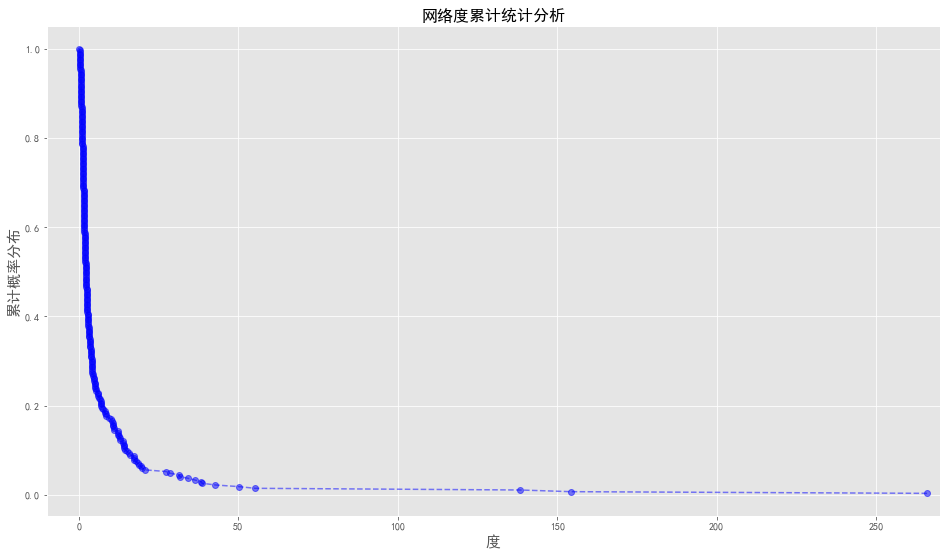

In [28]:
ana_01['prob'].cumsum().plot(style='b--o',figsize=(16,9),alpha=0.5,xlim=(-10,270))
plt.title('网络度累计统计分析',fontsize=16)
plt.xlabel('度',fontsize=15)
plt.ylabel('累计概率分布',fontsize=15)
plt.show()

In [29]:
ana_02 = df.copy()

In [30]:
ana_02.head()

,index,Unnamed: 0,ZGS_city,in,out,all
0,2,2,北京市,2244,6760,9004
1,1,1,深圳市,2458,2763,5221
2,0,0,上海市,2569,2114,4683
3,3,3,杭州市,846,1025,1871
4,5,5,广州市,761,937,1698


In [34]:
ana_02 = ana_02.drop(['index','Unnamed: 0'],axis=1)
ana_02.head()

,ZGS_city,in,out,all
0,北京市,2244,6760,9004
1,深圳市,2458,2763,5221
2,上海市,2569,2114,4683
3,杭州市,846,1025,1871
4,广州市,761,937,1698


In [35]:
ana_02['prob'] = ana_02['all'] / sum(ana_02['all'])
ana_02.head()

,ZGS_city,in,out,all,prob
0,北京市,2244,6760,9004,0.136918
1,深圳市,2458,2763,5221,0.079392
2,上海市,2569,2114,4683,0.071211
3,杭州市,846,1025,1871,0.028451
4,广州市,761,937,1698,0.025820


In [ ]:
ana_02.set_index('all',inplace=True)

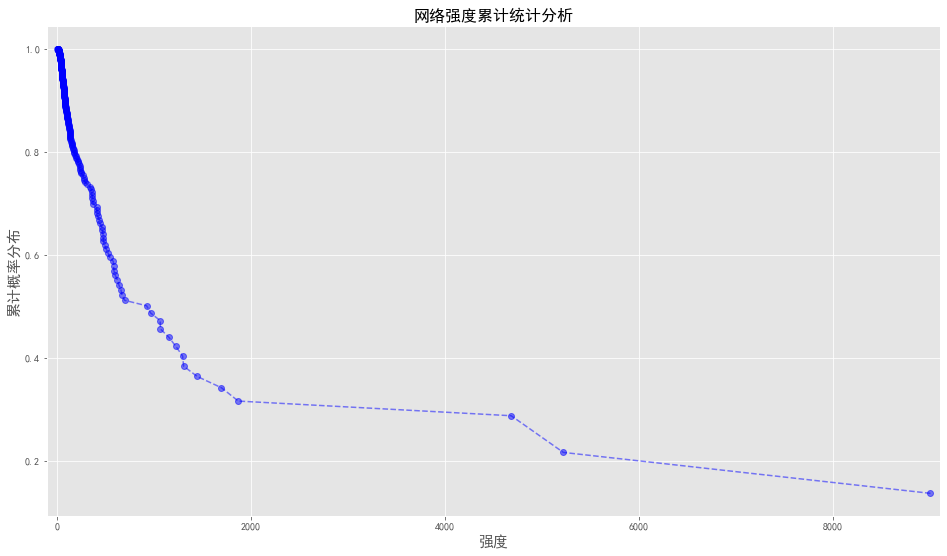

In [41]:
ana_02['prob'].cumsum().plot(style='b--o',figsize=(16,9),alpha=0.5,xlim=(-100,9100))
plt.title('网络强度累计统计分析',fontsize=16)
plt.xlabel('强度',fontsize=15)
plt.ylabel('累计概率分布',fontsize=15)
plt.show()